In [2]:
import os

# pysubs2 for subtitles?
# opencv for image processing
import cv2 as cv
import pysubs2

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

path = '/Users/benjidayan/Documents/torrents/hunter/'
fn = path + 'LR_Chinese_001_720P[52KHD].ts'

In [3]:
fns = os.listdir(path)
fns.sort()
fn = path + fns[0]
fn

'/Users/benjidayan/Documents/torrents/hunter/LR_Chinese_001_720P[52KHD].ts'

In [4]:
"""ffprobe -v error -select_streams v:0 -show_entries stream=width
,height -of csv=s=x:p=0 ./LR_Chinese_001_720P\[52KHD\].ts
1280x720"""

# https://video.stackexchange.com/questions/4563/how-can-i-crop-a-video-with-ffmpeg

# 140 padding either side, so 1000 width
# 200 height why not
# 500 padding from top
# ffmpeg -i ./LR_Chinese_001_720P\[52KHD\].ts -filter:v "crop=1000:200:140:500" -c:a copy out.mp4

# looking at the text:
# there is about 55 pixels extra space on top,  and 52 on bottom, for double layer text
# for single layer text, there is still 52 on bottom, but of course way extra
# text height is roughly 45 pixels
# text max width seems roughly 465 pixels

# 400 padding either side, so 480 width
# 93 height 
# 555 padding from top
# ffmpeg -i ./LR_Chinese_001_720P\[52KHD\].ts -filter:v "crop=480:93:400:555" -c:a copy out2.mp4

# actually not quite wide enough!
# 380 padding either side, so 530 width
# 93 height 
# 555 padding from top
# ffmpeg -i ./LR_Chinese_001_720P\[52KHD\].ts -filter:v "crop=530:93:380:555" -c:a copy out3.mp4

'ffprobe -v error -select_streams v:0 -show_entries stream=width\n,height -of csv=s=x:p=0 ./LR_Chinese_001_720P\\[52KHD\\].ts\n1280x720'

In [110]:
import cv2 as cv


fn = 'out3.mp4'
cap = cv.VideoCapture(fn)
ret, frame = cap.read()

frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
print(frame_count)
cap.set(cv.CAP_PROP_POS_FRAMES, 2000)
ret, frame = cap.read()

print(f'fps: {cap.get(cv.CAP_PROP_FPS)}')

42408


True

fps: 29.97002997002997


In [114]:
ret

True

In [111]:
cv.CAP_PROP_POS_FRAMES

1

In [115]:
print(f'fps: {cap.get(cv.CAP_PROP_FPS)}')

fps: 29.97002997002997


In [6]:
2000 /29.970

66.73340006673341

In [119]:
frame.shape

(92, 550, 3)

In [112]:
cap.set(cv.CAP_PROP_POS_FRAMES, 300)

True

In [113]:
cv.CAP_PROP_POS_FRAMES

1

In [117]:
cap.get(cv.CAP_PROP_FRAME_COUNT)

42408.0

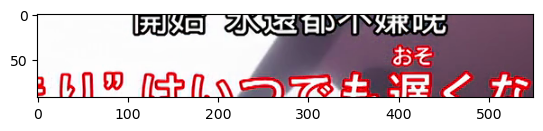

In [7]:
plt.imshow(frame)

True

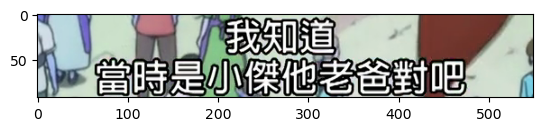

In [9]:
cap.set(cv.CAP_PROP_POS_FRAMES, 7300)
ret, frame = cap.read()
plt.imshow(frame)

In [10]:
# save frame to file
cv.imwrite('frame.png', frame)
!tesseract frame.png out -l chi_tra

True

Estimating resolution as 457


In [14]:
import numpy as np
white = frame == np.array([255, 255, 255])
frame.shape
white.shape

(92, 550, 3)

(92, 550, 3)

(92, 550)

(92, 550)

<Figure size 2000x2000 with 0 Axes>

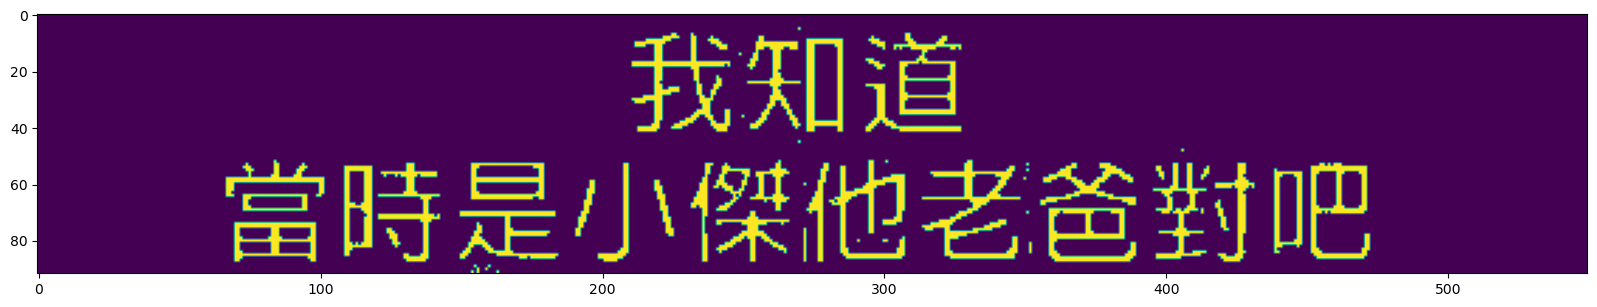

In [80]:
white = frame.sum(axis=2) >= 255*3-54
black = frame.sum(axis=2) == 0
white.shape
black.shape

black = black.astype(np.uint8)
white = white.astype(np.uint8)

plt.figure(figsize=(20, 20))
plt.imshow(white)

<Figure size 2000x2000 with 0 Axes>

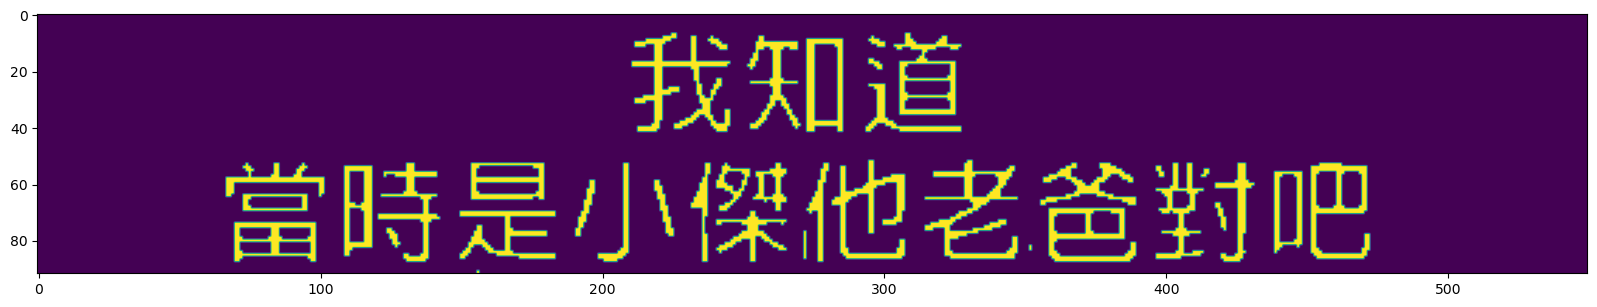

In [81]:
blur = cv.GaussianBlur(white,(3,3),0)
thresh = cv.threshold(blur, 100, 255, cv.THRESH_BINARY)[1]
plt.figure(figsize=(20, 20))
plt.imshow(blur)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

<Figure size 2000x2000 with 0 Axes>

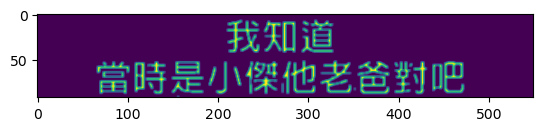

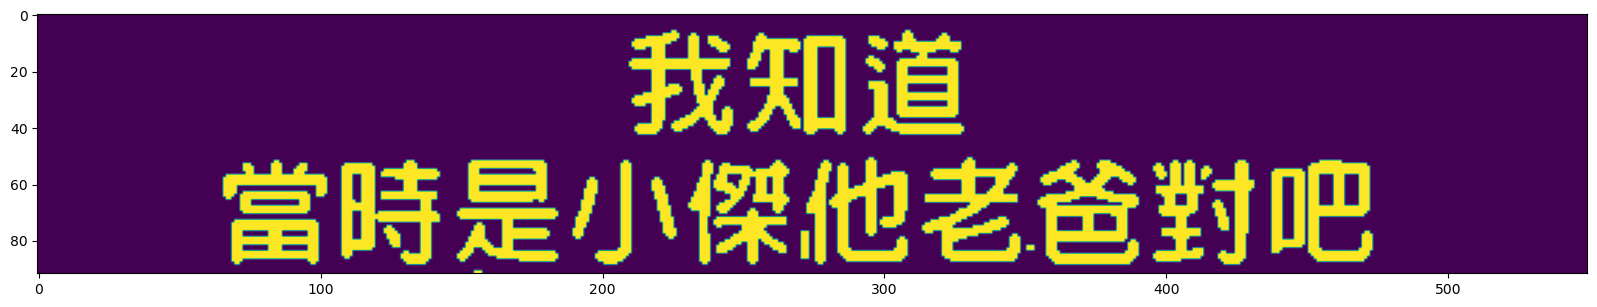

In [120]:
from scipy.ndimage import convolve
from skimage.filters import threshold_otsu
kernel = np.ones((3,3)) / 9  # A simple averaging kernel
convolved_image = convolve(blur.astype(np.float64), kernel)
blur
plt.imshow(convolved_image)
thresh = threshold_otsu(convolved_image)
binary = convolved_image > thresh
plt.figure(figsize=(20, 20))
plt.imshow(binary*255)

In [99]:
out = 255 - binary*255
# save to file
cv.imwrite('frame3.png', out)

True

In [102]:
!tesseract frame3.png - -l chi_tra

Estimating resolution as 467
我知道
當時是小傑他老爸對吧


In [103]:
# do tesseract with subprocess and get output
import subprocess
p = subprocess.Popen(['tesseract', 'frame3.png', '-', '-l', 'chi_tra'], stdout=subprocess.PIPE)
out, err = p.communicate()
out = out.decode('utf-8')
out

Estimating resolution as 467


'我知道\n當時是小傑他老爸對吧\n'

In [109]:
print(out)
# tranlsate out chinese traditional to chinese simplified
import opencc
cc = opencc.OpenCC('t2s')
out_simplified = cc.convert(out)
print(out_simplified)

我知道
當時是小傑他老爸對吧

我知道
当时是小杰他老爸对吧



In [106]:
!pip install opencc

  Preparing metadata (setup.py) ... done
  Created wheel for opencc: filename=OpenCC-0.2-py3-none-any.whl size=6563 sha256=679f100369ad62474c9df82060835c918edce7d7ad39ac01555932474e862632
  Stored in directory: /Users/benjidayan/Library/Caches/pip/wheels/40/49/58/51f3e35f4499f847f7f9f20a6d40517cf1ade32af428f22126
Successfully built opencc


<Figure size 2000x2000 with 0 Axes>

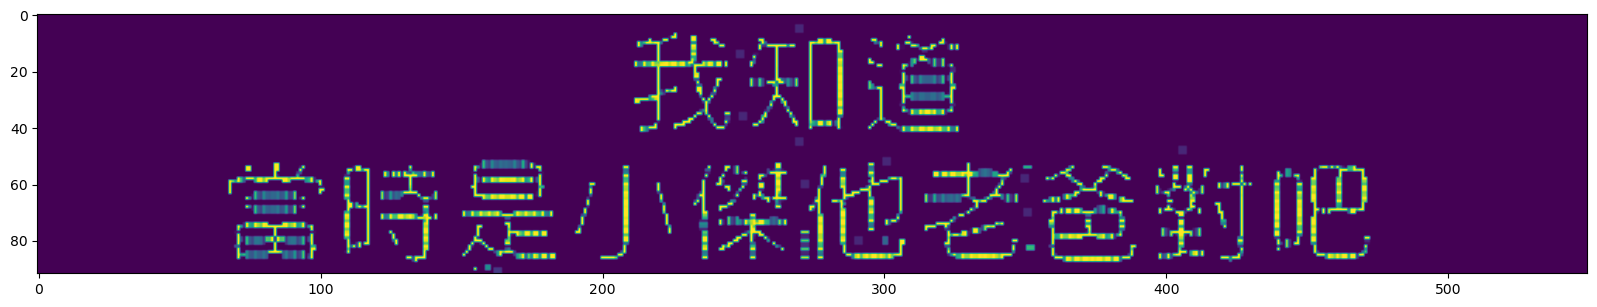

In [60]:
import skimage
psf = np.ones((3,3)) / 9
white2 = skimage.restoration.richardson_lucy(white, psf)
plt.figure(figsize=(20, 20))
plt.imshow(white2)

<Figure size 2000x2000 with 0 Axes>

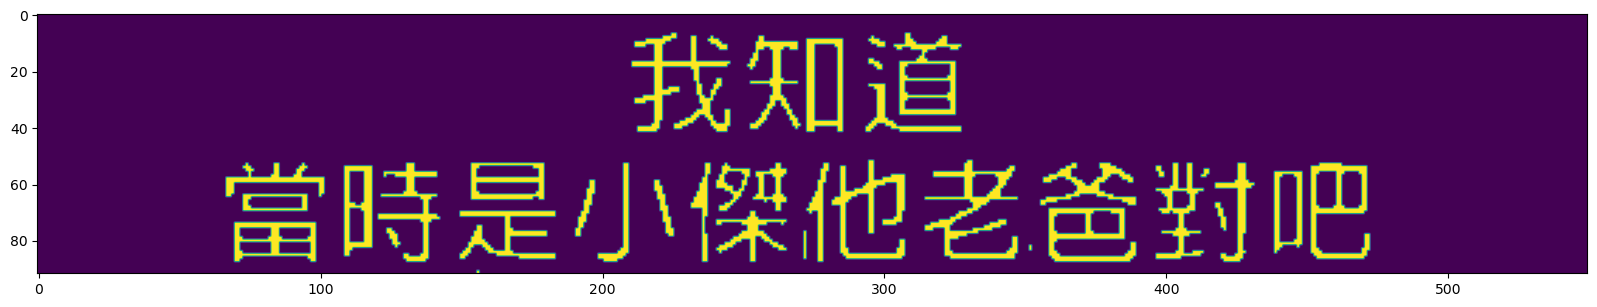

In [64]:
blur = cv.GaussianBlur(white,(3,3),0)
thresh = cv.threshold(blur, 100, 255, cv.THRESH_BINARY)[1]
plt.figure(figsize=(20, 20))
plt.imshow(blur)

<Figure size 2000x2000 with 0 Axes>

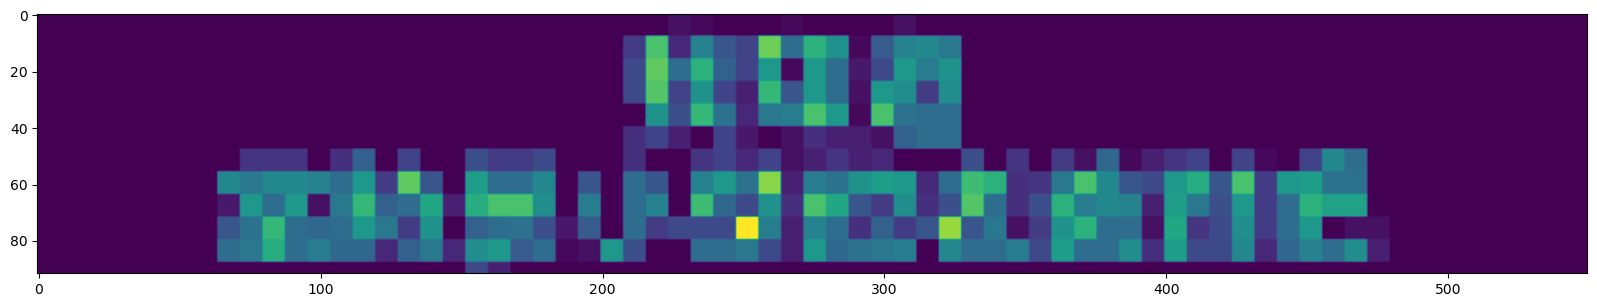

In [52]:
import skimage
white2 = skimage.restoration.denoise_wavelet(white*255)
plt.figure(figsize=(20, 20))
plt.imshow(white2)

<Figure size 2000x2000 with 0 Axes>

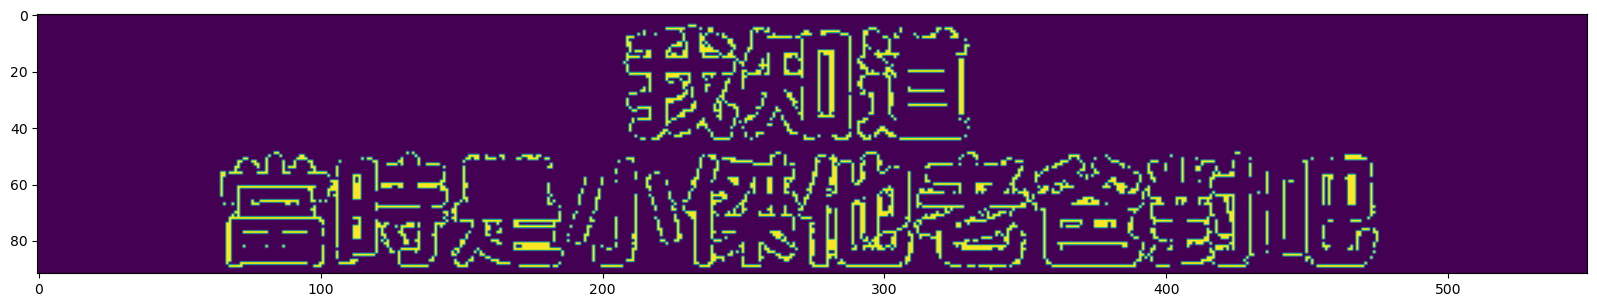

In [38]:
plt.figure(figsize=(20, 20))
plt.imshow(black)

In [35]:
import scipy
black_nhbs = scipy.signal.convolve2d(black.astype(bool), np.ones((3,3)), mode='same')
black_nhbs = black_nhbs > 0
black_nhbs.shape

(92, 550)

In [36]:
black_nhbs.max()

9.0

In [ ]:
np.convolve2d()

In [ ]:
# get zone of maximum contrast between white and black
# this is the text zone
# then get the text zone

